# Graph Visualization
Here we will load a graph database from for the [Pennslyvania Road Network](https://snap.stanford.edu/data/roadNet-PA.html) and create a basic graph analysis including graph diameter and other metrics.

In [1]:
# import necessary packages
import urllib.request
import gzip
import networkx as nx
import matplotlib.pyplot as plt

## Download data
- Download and save graph database file
- Create preview for first 100 lines of file
- Save and view results

In [3]:
# URL of the .txt.gz file
url = 'https://snap.stanford.edu/data/roadNet-PA.txt.gz'
output_file = './data/output.txt'  # Path to the output file
preview_file = './data/preview.txt'  # Path to the preview file

# download the file and save it to temp location
temp_file, _ = urllib.request.urlretrieve(url) # returns tuple path, http response header

# decompress downloaded file
with gzip.open(temp_file, 'rb') as gz_file:
    # read as lines and decode as utf-8
    lines = gz_file.readlines()
    decoded_lines = [line.decode('utf-8') for line in lines]

# save decoded lines to a file
with open(output_file, 'w', encoding='utf-8') as f:
    f.writelines(decoded_lines)

# save first 50 lines as preview
with open(preview_file, 'w', encoding='utf-8') as f:
    f.writelines(decoded_lines[:100])

In [4]:
# load preview file
with open(preview_file, "r", encoding='utf-8') as f:
    preview_contents = f.read()

# view contents
print(preview_contents)

# Directed graph (each unordered pair of nodes is saved once): roadNet-PA.txt 
# Pennsylvania road network
# Nodes: 1088092 Edges: 3083796
# FromNodeId	ToNodeId
0	1
0	6309
0	6353
1	0
6353	0
6353	6354
6353	6364
6353	6386
6309	0
6309	6310
6309	6344
2	3
2	4
2	7
3	2
3	309
4	2
4	273
4	274
4	388
7	2
7	8
7	16
7	3998
309	3
309	6
309	274
309	1060390
273	4
273	3861
273	3862
273	3872
274	4
274	309
274	3862
274	1060215
388	4
388	389
388	4005
388	4006
5	6
5	8
5	9
6	5
6	305
6	309
6	310
6	1060307
9	5
9	12
9	10464
8	5
8	7
305	6
310	6
310	15
310	311
1060307	6
1060307	1060308
1060307	1087545
16	7
16	17
16	18
3998	7
3998	3999
3998	4006
12	9
12	13
12	14
10464	9
10464	311
10	11
10	22
10	77
11	10
11	44
22	10
22	44
22	58
22	69
77	10
77	76
77	197
44	11
44	22
44	45
44	51
13	12
14	12
14	15
14	20
15	14
15	310
15	312
20	14
20	19



## Load into networkx
- Create graph object
- open file and iterate through
- Skip header info by only assigning values to edges if length equals 2

In [5]:
# create graph object
G = nx.Graph()

# load into graph
with open(preview_file, 'r') as f:
    for line in f:
        values = line.strip().split()
        if len(values) == 2:
            u, v = values
            G.add_edge(u, v)

# check results
print("Number of nodes", G.number_of_nodes())
print("Number of edges", G.number_of_edges())
print(G)

Number of nodes 59
Number of edges 63
Graph with 59 nodes and 63 edges


## Plot graph

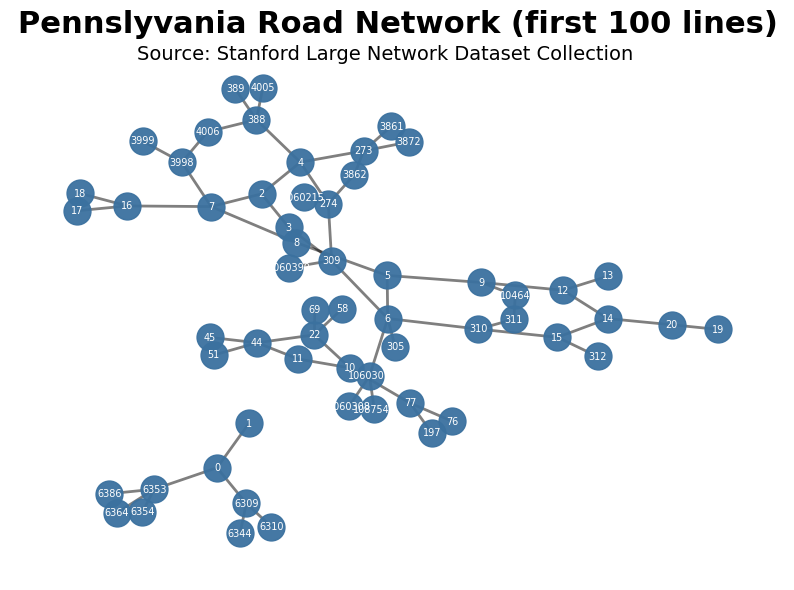

In [6]:
# create fig
plt.figure(figsize=(10,7))

# calculate the positions of the nodes
pos = nx.spring_layout(G)

# draw nodes
nx.draw_networkx_nodes(G,
                       pos,
                       node_size=375, 
                       node_color='#3B719F',
                       alpha=0.95,
                       node_shape='o')

# edges
nx.draw_networkx_edges(G,
                       pos, 
                       alpha=0.5, 
                       width=2)

# labels
nx.draw_networkx_labels(G,
                        pos,
                        font_size=7, 
                        font_family='sans-serif',
                        font_color='w')

# title
plt.title("Pennslyvania Road Network (first 100 lines)", 
          fontdict={'fontsize':22,'weight':'bold'})
plt.suptitle("Source: Stanford Large Network Dataset Collection", 
             fontsize=14, 
             y=0.875,
             fontweight='normal')

# axis off
plt.axis('off')
plt.savefig("./images/pennslyvania_road_network.png")
plt.show()  

## Graph Analysis
We will look at the following:

- **Diameter**:
the diameter of a graph tells you the maximum number of steps or edges needed to go from one node to another within the graph. It indicates the "longest distance" between any two nodes in terms of the shortest path.
For example, a smaller diameter suggests the nodes are closer together, whilst a larger diameter suggests they are further apart.

- **Average Degree**:
measure of the average number of edges connected to each node in the graph. This provides an indication of the connectivity or level of interaction between nodes in the network.

In [7]:
# calculate the graph's diameter
# get connected components
components = list(nx.connected_components(G))

# calculate the diameter for each connected component
for i, component in enumerate(components):
    component_graph = G.subgraph(component)
    diameter = nx.diameter(component_graph)
    avg_degree = nx.average_degree_connectivity(component_graph)
    print("Component", i+1, "Diameter:", diameter)
    print(f"Average Degree Connectivity for Component {i+1}: {avg_degree}")

Component 1 Diameter: 4
Average Degree Connectivity for Component 1: {1: 3.5, 3: 2.1666666666666665, 4: 1.5}
Component 2 Diameter: 10
Average Degree Connectivity for Component 2: {3: 2.6666666666666665, 2: 3.0714285714285716, 4: 2.7083333333333335, 5: 2.8, 1: 3.466666666666667}
Component 3 Diameter: 5
Average Degree Connectivity for Component 3: {1: 3.6666666666666665, 2: 3.5, 3: 2.3333333333333335, 4: 2.125}


Here we can see that `Component 1` diameter of 4 is smallest of the group, this suggests the nodes are closer together.
<br>Whereas `Component 2` with a diameter of 10 shows they are furthest apart of the group.
This shows the average connectivity of each component and the nodes within each. <br>For example `Node 3` in `Component 1`, is connected on average to ~2.16 nodes in the graph.<br>
Whereas `Node 1` in `Component 1` is connected on average to ~3.5.<br>
Therefore we could say that `Node 1` has a denser network with more interconnected nodes than `Node 3`.